In [1]:
import pandas
data = pandas.read_csv("datasets\Tweets.csv")
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
# Check for empties
data.isnull().sum()
#Text and airline sentiments,no empties

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
data.dtypes
#the data types are correct

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [5]:
# split to 30% for testing 70% for training
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data['text'], data['airline_sentiment'],
                                                                    test_size = 0.3,
                                                                    random_state=42)

In [6]:
# remove stop words  from X_train or X_test, and into a numerical representation suitable for machine learning tasks using scikit-learn's CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer #importing the CountVectorizer class, which helps convert text documents into a numerical representation based on word frequencies.
vectorizer = CountVectorizer(lowercase = True, stop_words = 'english') # lowercase = True: Converts all text to lowercase before processing (recommended for most NLP tasks).
# stop_words = 'english': Instructs the vectorizer to remove stop words from the analysis (using the built-in English stop words list)

X_train_new = vectorizer.fit_transform(X_train)
# .fit(X_train): Fits the vectorizer to the training data (X_train). This analyzes the vocabulary and creates a document-term matrix
# .transform(X_train): Transforms the training data (X_train) using the fitted vectorizer. This converts each text document into a numerical feature vector representing word frequencies.
X_train_new

<10248x12061 sparse matrix of type '<class 'numpy.int64'>'
	with 93480 stored elements in Compressed Sparse Row format>

In [7]:
# creates and trains a Logistic Regression model for classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

model = LogisticRegression()
model.fit(X_train_new, Y_train)

LogisticRegression()

In [9]:
# test the model, first vectorize
X_test_new = vectorizer.transform(X_test)
predictions = model.predict(X_test_new)
print(data.groupby('airline_sentiment').size())

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64


In [10]:
#Test accuracy
from sklearn.metrics import accuracy_score
print('Accuracy ', accuracy_score(Y_test, predictions))

Accuracy  0.7896174863387978


In [11]:
from sklearn.metrics import classification_report # it show the classification of the metrics on per-class basis
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      2814
     neutral       0.61      0.55      0.57       884
    positive       0.76      0.66      0.71       694

    accuracy                           0.79      4392
   macro avg       0.74      0.70      0.72      4392
weighted avg       0.78      0.79      0.79      4392



In [12]:
# pull a database, csv, from api
newdata = pandas.read_csv("datasets\sample.csv")
newdata

,Text
0,your airline is awesome but your lax loft need...
1,"not worried, it's been a great ride in a new p..."
2,awesome. I flew yall Sat morning. Any way we c...
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a..."
4,"Hi, Virgin, I like your services"
5,"Your services are bad, its not as expected"
6,Its very unfortunate that I did not get what I...
7,"This is not good, improve!"
8,I waited for 40 minutes but we left though
9,"this is very nice, I enjoyed"


In [15]:
# Use the model to predict above clients sentiments
newdata_vectorized = vectorizer.transform(newdata['Text'])
outcome = model.predict(newdata_vectorized)
print('airline_sentiment',  outcome)
#Improve the model to atleast 85%
outcomedf = pandas.DataFrame(outcome,  columns=['Sentiment'])
outcomedf

airline_sentiment ['negative' 'positive' 'positive' 'neutral' 'neutral' 'negative' 'neutral'
 'positive' 'negative' 'positive' 'negative' 'neutral']


,Sentiment
0,negative
1,positive
2,positive
3,neutral
4,neutral
5,negative
6,neutral
7,positive
8,negative
9,positive


In [12]:
results = newdata.merge(outcomedf, left_index=True,right_index=True)
results

,Text,Sentiment
0,your airline is awesome but your lax loft need...,negative
1,"not worried, it's been a great ride in a new p...",positive
2,awesome. I flew yall Sat morning. Any way we c...,positive
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a...",neutral
4,"Hi, Virgin, I like your services",neutral
5,"Your services are bad, its not as expected",negative
6,Its very unfortunate that I did not get what I...,neutral
7,"This is not good, improve!",positive
8,I waited for 40 minutes but we left though,negative
9,"this is very nice, I enjoyed",positive


<Axes: >

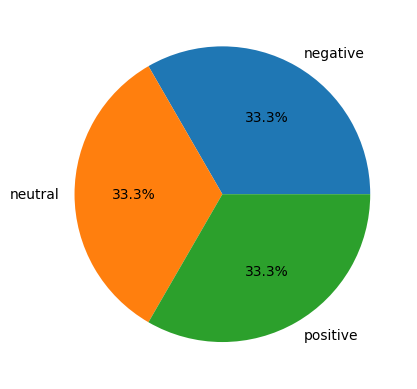

In [16]:
import matplotlib.pyplot as plt

results.groupby('Sentiment').size().plot(kind='pie', autopct = '%1.1f%%')

In [19]:
negatives = results[results['Sentiment'] == 'negative']
negatives

positives = results[results['Sentiment'] == 'positive']
positives

neutral = results[results['Sentiment'] == 'neutral']
neutral

,Text,Sentiment
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a...",neutral
4,"Hi, Virgin, I like your services",neutral
6,Its very unfortunate that I did not get what I...,neutral
11,I enjoyed my journey on this flight,neutral


In [22]:
# create a CSV with the negatives only
# negatives.to_excel("sample_data/negatives.xls")
# positives.to_excel("sample_data/positives.xls")
# neutral.to_excel("sample_data/neutral.xls")